## Reading the Data and Observations on Dataset

In [70]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
cd sample_data

[Errno 2] No such file or directory: 'sample_data'
/content/sample_data


In [72]:
import pandas as pd
data = pd.read_excel('customer_churn_large_dataset.xlsx')

data.head(5)


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [73]:
print(len(data))

100000


In [74]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB
None


In [75]:
print(data.describe())



          CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.6400

In [76]:
data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Great! There are no missing values.

# Data preprocessing and cleaning

Decided to remove the CustomerID, Name columns as they won't making any impact on model.

In [77]:
data.drop(["CustomerID"], inplace = True, axis = 1)

In [79]:
data.drop(["Name"], inplace = True, axis = 1)

In [80]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [81]:
# Handling missing data
data.dropna(inplace=True)

# Handling outliers (you can use appropriate methods depending on the distribution of your data)
# For example, using z-score for numerical columns
from scipy.stats import zscore
z_scores = zscore(data[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])
data = data[(z_scores < 3).all(axis=1)]


In [82]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [83]:
# Example: Remove outliers using IQR
Q1 = data['Total_Usage_GB'].quantile(0.25)
Q3 = data['Total_Usage_GB'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Total_Usage_GB'] >= Q1 - 1.5 * IQR) & (data['Total_Usage_GB'] <= Q3 + 1.5 * IQR)]


In [84]:
# Let's say 'Gender' is a categorical column you want to encode
data= pd.get_dummies(data, columns=['Gender'], drop_first=True)


In [85]:
# Example: Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Age', 'Monthly_Bill']] = scaler.fit_transform(data[['Age', 'Monthly_Bill']])


In [86]:
data

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male
0,0.865385,Los Angeles,17,0.619429,236,0,1
1,0.846154,New York,1,0.268000,172,0,0
2,0.115385,Los Angeles,5,0.792429,460,0,0
3,0.346154,Miami,3,0.970571,297,1,0
4,0.538462,Miami,19,0.402000,266,0,0
...,...,...,...,...,...,...,...
99995,0.288462,Houston,23,0.359000,226,1,1
99996,0.846154,New York,19,0.452143,351,0,0
99997,0.884615,Chicago,17,0.944429,251,1,1
99998,0.634615,New York,20,0.275000,434,1,0


# feature engineering


In [87]:
# Example: Create a feature for the ratio of Monthly_Bill to Total_Usage_GB
data['Bill_to_Usage_Ratio'] = data['Monthly_Bill'] / data['Total_Usage_GB']


In [88]:
# Example: Create an interaction feature
data['Subscription_Bill_Interaction'] = data['Subscription_Length_Months'] * data['Monthly_Bill']


In [89]:
# Example: Calculate the average Monthly_Bill by Location
average_bill_by_location = data.groupby('Location')['Monthly_Bill'].mean().reset_index()
average_bill_by_location.rename(columns={'Monthly_Bill': 'Avg_Monthly_Bill_Location'}, inplace=True)
data = data.merge(average_bill_by_location, on='Location', how='left')


In [90]:
# Example: If you know that certain Age ranges are more likely to churn, create an Age_Group feature
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 25, 35, 50, 100], labels=[0, 1,2,3])


In [91]:
data

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Bill_to_Usage_Ratio,Subscription_Bill_Interaction,Avg_Monthly_Bill_Location,Age_Group
0,0.865385,Los Angeles,17,0.619429,236,0,1,0.002625,10.530286,0.502748,0
1,0.846154,New York,1,0.268000,172,0,0,0.001558,0.268000,0.502500,0
2,0.115385,Los Angeles,5,0.792429,460,0,0,0.001723,3.962143,0.502748,0
3,0.346154,Miami,3,0.970571,297,1,0,0.003268,2.911714,0.499304,0
4,0.538462,Miami,19,0.402000,266,0,0,0.001511,7.638000,0.499304,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.288462,Houston,23,0.359000,226,1,1,0.001588,8.257000,0.501828,0
99996,0.846154,New York,19,0.452143,351,0,0,0.001288,8.590714,0.502500,0
99997,0.884615,Chicago,17,0.944429,251,1,1,0.003763,16.055286,0.497419,0
99998,0.634615,New York,20,0.275000,434,1,0,0.000634,5.500000,0.502500,0


<ipython-input-127-929b20b3ec89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


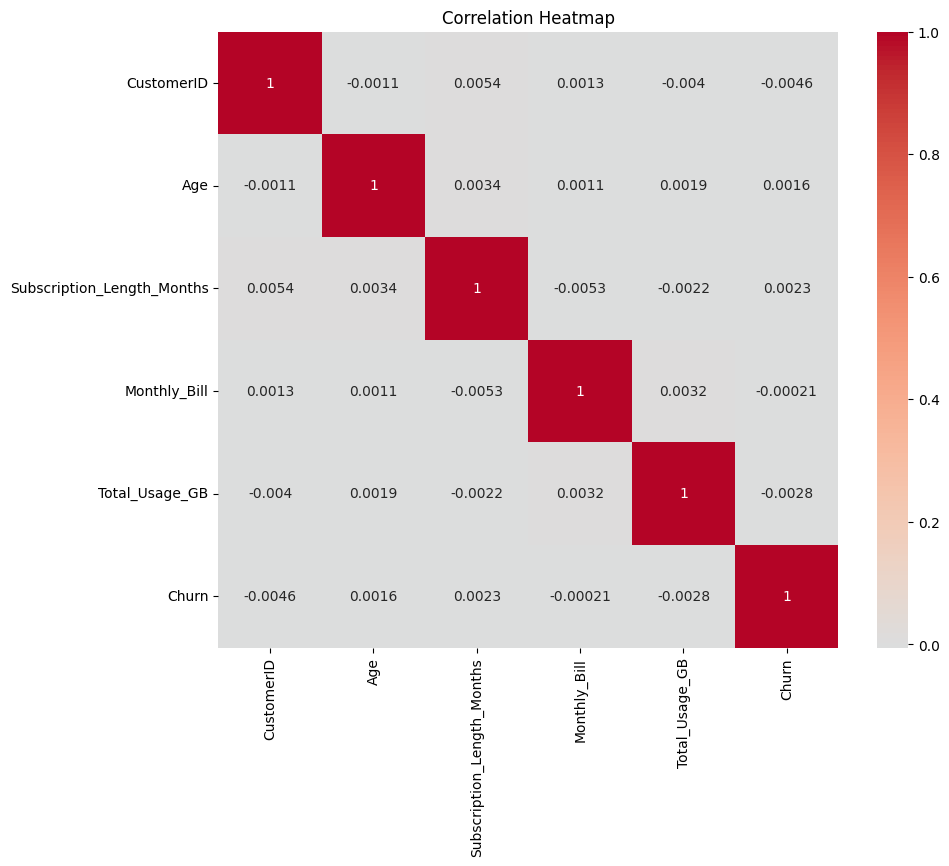

In [127]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Customer churn is highly correlated with Age and Subscription_Lenght_Month

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender_Male'])
data['Location'] = encoder.fit_transform(data['Location'])

# Split the data into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Feature engineering
X_train['Bill_to_Usage_Ratio'] = X_train['Monthly_Bill'] / X_train['Total_Usage_GB']
X_test['Bill_to_Usage_Ratio'] = X_test['Monthly_Bill'] / X_test['Total_Usage_GB']




In [95]:
X_train

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Bill_to_Usage_Ratio,Subscription_Bill_Interaction,Avg_Monthly_Bill_Location,Age_Group,Gender
75220,0.692308,4,5,0.778571,205,0,0.003798,3.892857,0.502500,0,0
48955,0.192308,4,24,0.743714,239,1,0.003112,17.849143,0.502500,0,1
44966,0.750000,0,12,0.318429,62,1,0.005136,3.821143,0.497419,0,1
13568,0.019231,1,19,0.036714,173,1,0.000212,0.697571,0.501828,0,1
92727,0.730769,3,8,0.050286,314,0,0.000160,0.402286,0.499304,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6265,0.326923,3,21,0.533286,235,1,0.002269,11.199000,0.499304,0,1
54886,0.730769,0,13,0.791429,347,1,0.002281,10.288571,0.497419,0,1
76820,0.980769,1,2,0.660571,321,1,0.002058,1.321143,0.501828,0,1
860,0.711538,0,12,0.845571,315,1,0.002684,10.146857,0.497419,0,1


In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [107]:

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the first few rows of the scaled dataset
print(X_train_scaled)


[[ 6.53446686e-01  1.41703505e+00 -1.08272837e+00 ...  8.41406774e-01
   0.00000000e+00 -9.95534968e-01]
 [-1.04827574e+00  1.41703505e+00  1.66388226e+00 ...  8.41406774e-01
   0.00000000e+00  1.00448506e+00]
 [ 8.49799274e-01 -1.41806277e+00 -7.08191867e-02 ... -1.61937346e+00
   0.00000000e+00  1.00448506e+00]
 ...
 [ 1.63520963e+00 -7.09288318e-01 -1.51640373e+00 ...  5.15808394e-01
   0.00000000e+00  1.00448506e+00]
 [ 7.18897549e-01 -1.41806277e+00 -7.08191867e-02 ... -1.61937346e+00
   0.00000000e+00  1.00448506e+00]
 [-1.17917747e+00 -5.13861481e-04  6.51973084e-01 ...  9.61784624e-01
   0.00000000e+00 -9.95534968e-01]]


# Model selection and optimization.

In [109]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well

# Impute missing values in the feature matrix
X_imputed = imputer.fit_transform(X_train)
X_test_imputed= imputer.transform(X_test)
# Initialize the model
model = RandomForestClassifier(random_state=42)
# Train the model
model.fit(X_imputed, y_train)



RandomForestClassifier(random_state=42)

In [118]:
y_pred=model.predict(X_test_imputed)

In [119]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.50
Accuracy: 0.50
Precision: 0.50
Recall: 0.47
F1 Score: 0.48


In [124]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1')

# Perform grid search
grid_search.fit(X_imputed, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_test_imputed)

# Evaluate the best model
f1_best = f1_score(y_test, y_pred_best)
print(f"Best F1 Score: {f1_best:.2f}")


Best F1 Score: 0.49
